## **PART - I :** _Data and Feature Engineering_

In [12]:
import collections
import os
from sklearn import (
    datasets, model_selection, feature_extraction, linear_model
)
import warnings
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
df = pd.read_csv('./dataset.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [14]:
print('{} files loaded.'.format(len(df['comment_text'])))

159571 files loaded.


In [15]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/suhasreddy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
def extract_features(corpus):
    '''Extract TF-IDF features from corpus'''
    # vectorize means we turn non-numerical data into an array of numbers
    count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=word_tokenize,  # use the NLTK tokenizer
        stop_words='english',  # remove stop words
        min_df=1  # minimum document frequency, i.e. the word must appear more than once.
    )
    processed_corpus = count_vectorizer.fit_transform(corpus)
    processed_corpus = feature_extraction.text.TfidfTransformer().fit_transform(
        processed_corpus)

    return processed_corpus

In [19]:
df_tfidf = extract_features(df['comment_text'])

In [20]:
updated_df = df.drop(columns = ['id', 'comment_text'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_tfidf, updated_df, test_size = 0.2, random_state = 45)

In [22]:
print("X Train Shape", X_train.shape)
print("Y Train Shape", Y_train.shape)
print("X Test Shape", X_test.shape)
print("Y Test Shape", Y_train.shape)

X Train Shape (127656, 256248)
Y Train Shape (127656, 6)
X Test Shape (31915, 256248)
Y Test Shape (127656, 6)


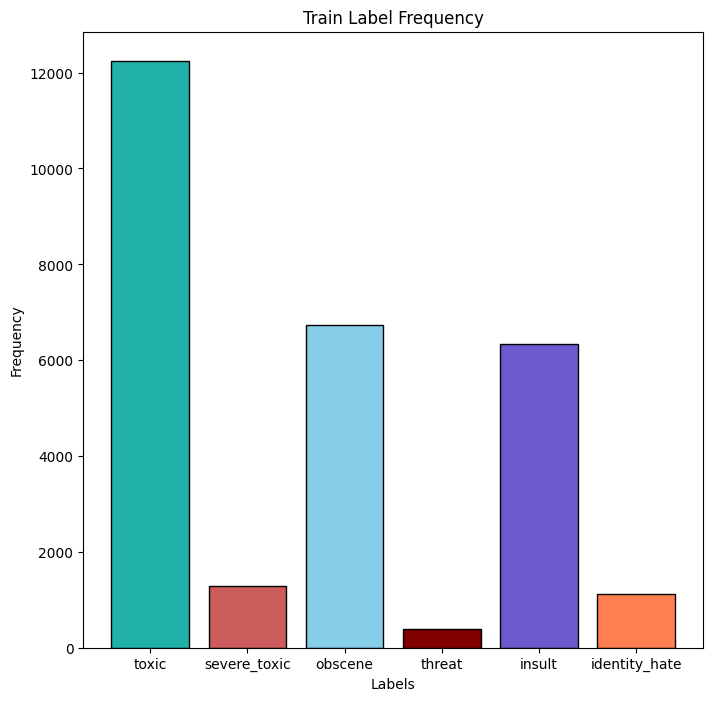

In [24]:
import matplotlib.pyplot as plt
label_counts = Y_train.sum()
colors = ['lightseagreen', 'indianred', 'skyblue', 'maroon', 'slateblue', 'coral']
plt.figure(figsize=(8, 8))
plt.bar(label_counts.index, label_counts.values, color = colors, edgecolor = 'black')
plt.title('Train Label Frequency')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

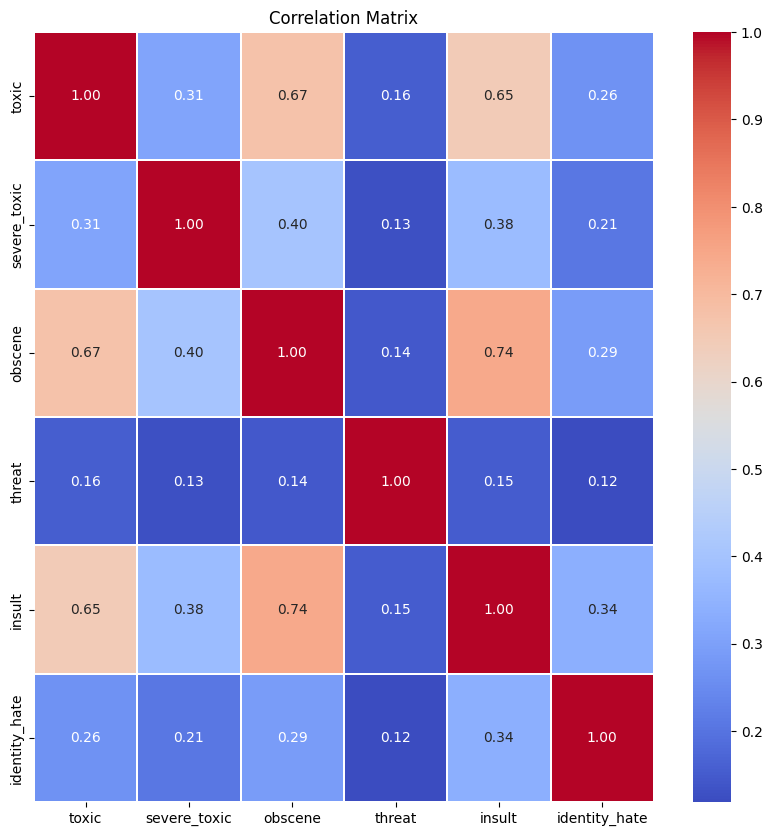

In [25]:
import seaborn as sb
corr_mat = Y_train.corr()
plt.figure(figsize=(10, 10))
sb.heatmap(corr_mat, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.25)
plt.title('Correlation Matrix')
plt.show()

## **PART - II :** _Modeling and Evaluation_

In [27]:
df = pd.read_csv('./dataset.csv')
X = df_tfidf
Y = df['toxic']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 45)
print("X Train Shape", X_train.shape)
print("Y Train Shape", Y_train.shape)
print("X Test Shape", X_test.shape)
print("Y Test Shape", Y_train.shape)

X Train Shape (127656, 256248)
Y Train Shape (127656,)
X Test Shape (31915, 256248)
Y Test Shape (127656,)


### **Model-1 :** _Multinomial Naive Bayes_

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [30]:
mod_1 = MultinomialNB()
mod_1.fit(X_train, Y_train)

MultinomialNB()

In [31]:
mod_1_pred = mod_1.predict(X_test)
accuracy = accuracy_score(Y_test, mod_1_pred)
report = classification_report(Y_test, mod_1_pred)
print(f"\nMultinomial Naive Bayes\nAccuracy: {accuracy*100:.2f}%\nClassification Report:\n{report}")


Multinomial Naive Bayes
Accuracy: 91.69%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28866
           1       0.99      0.13      0.23      3049

    accuracy                           0.92     31915
   macro avg       0.95      0.57      0.59     31915
weighted avg       0.92      0.92      0.89     31915



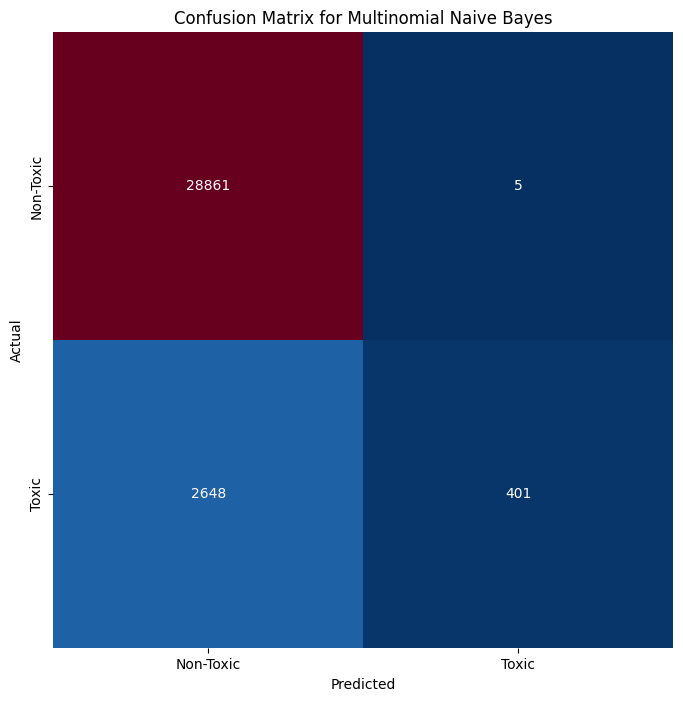

In [32]:
conf_mat = confusion_matrix(Y_test, mod_1_pred)
plt.figure(figsize=(8, 8))
sb.heatmap(conf_mat, annot = True, fmt = 'd', cmap='RdBu_r', cbar = False, xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.title(f'Confusion Matrix for Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Model-2 :** _Logistic Regression_

In [33]:
mod_2 = LogisticRegression()
mod_2.fit(X_train, Y_train)

LogisticRegression()

In [34]:
mod_2_pred = mod_2.predict(X_test)
accuracy = accuracy_score(Y_test, mod_2_pred)
report = classification_report(Y_test, mod_2_pred)
print(f"\nLogistic Regression\nAccuracy: {accuracy*100:.2f}%\nClassification Report:\n{report}")


Logistic Regression
Accuracy: 95.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28866
           1       0.92      0.58      0.71      3049

    accuracy                           0.96     31915
   macro avg       0.94      0.79      0.84     31915
weighted avg       0.95      0.96      0.95     31915



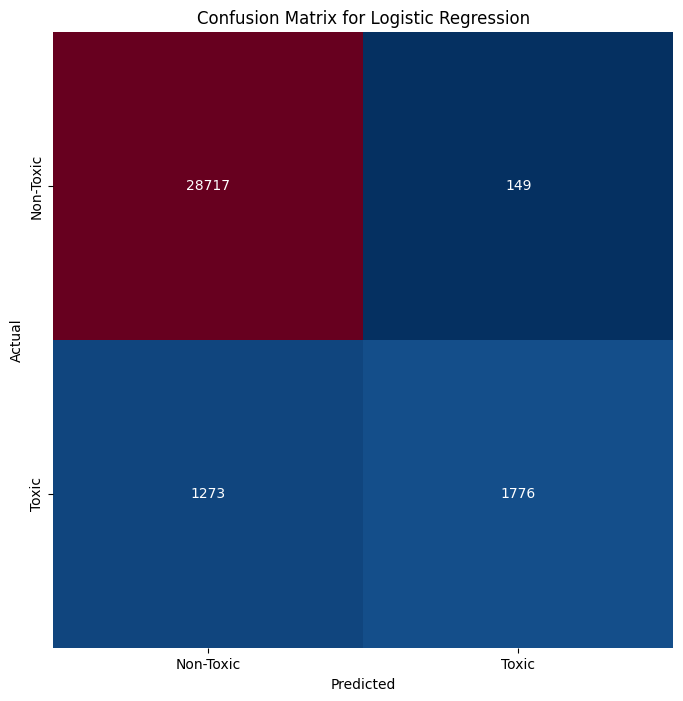

In [35]:
conf_mat = confusion_matrix(Y_test, mod_2_pred)
plt.figure(figsize=(8, 8))
sb.heatmap(conf_mat, annot = True, fmt = 'd', cmap='RdBu_r', cbar = False, xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.title(f'Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Model-3 :** _Support Vector Machine_

In [36]:
mod_3 = LinearSVC()
mod_3.fit(X_train, Y_train)

LinearSVC()

In [37]:
mod_3_pred = mod_3.predict(X_test)
accuracy = accuracy_score(Y_test, mod_3_pred)
report = classification_report(Y_test, mod_3_pred)
print(f"\nSupport Vector Machine\nAccuracy: {accuracy*100:.2f}%\nClassification Report:\n{report}")


Support Vector Machine
Accuracy: 96.01%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28866
           1       0.89      0.67      0.76      3049

    accuracy                           0.96     31915
   macro avg       0.93      0.83      0.87     31915
weighted avg       0.96      0.96      0.96     31915



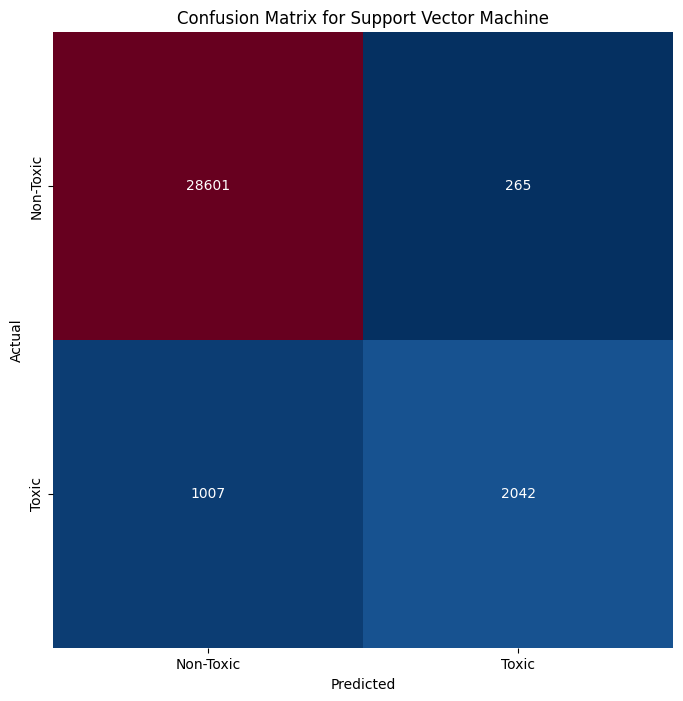

In [38]:
conf_mat = confusion_matrix(Y_test, mod_3_pred)
plt.figure(figsize=(8, 8))
sb.heatmap(conf_mat, annot = True, fmt = 'd', cmap='RdBu_r', cbar = False, xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.title(f'Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Ensemble Method**

In [39]:
from sklearn.ensemble import VotingClassifier
mod_4 = VotingClassifier(estimators=[('MNB', mod_1), ('LR', mod_2), ('SVM', mod_3)], voting='hard')
mod_4.fit(X_train, Y_train)

VotingClassifier(estimators=[('MNB', MultinomialNB()),
                             ('LR', LogisticRegression()),
                             ('SVM', LinearSVC())])

In [40]:
mod_4_pred = mod_4.predict(X_test)
accuracy = accuracy_score(Y_test, mod_4_pred)
report = classification_report(Y_test, mod_4_pred)
print(f"\nVoting Classifier\nAccuracy: {accuracy*100:.2f}%\nClassification Report:\n{report}")


Voting Classifier
Accuracy: 95.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     28866
           1       0.94      0.57      0.71      3049

    accuracy                           0.96     31915
   macro avg       0.95      0.78      0.84     31915
weighted avg       0.95      0.96      0.95     31915



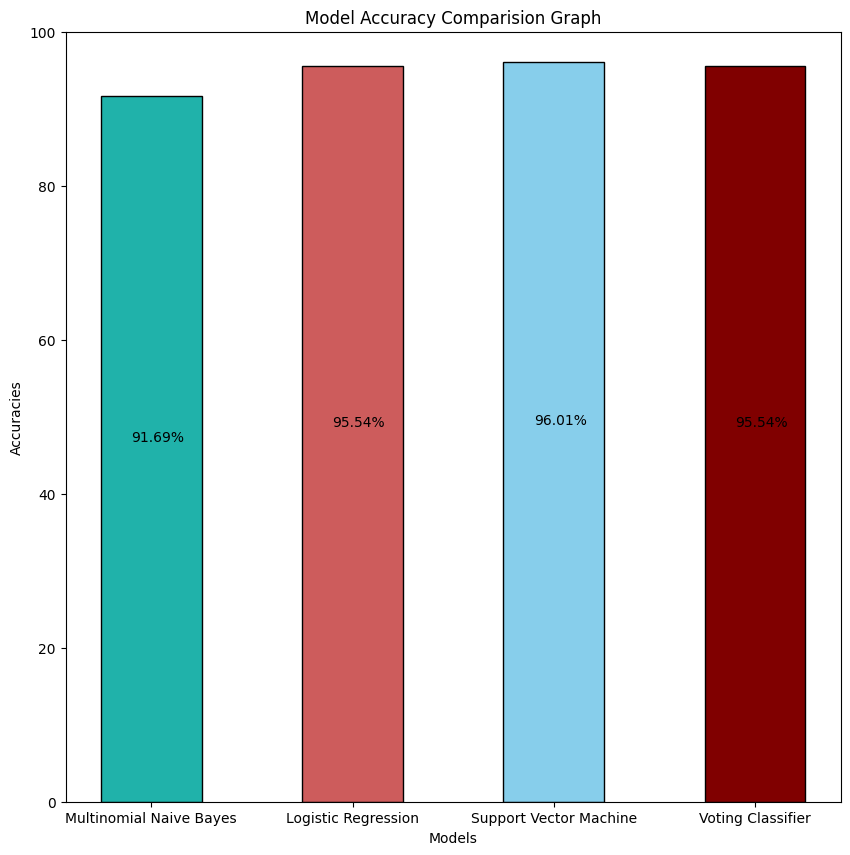

In [41]:
models = [mod_1, mod_2, mod_3, mod_4]
labels = ['Multinomial Naive Bayes', 'Logistic Regression', 'Support Vector Machine', 'Voting Classifier']
accuracies = [accuracy_score(Y_test, model.predict(X_test)) * 100 for model in models]
plt.figure(figsize=(10, 10))
bars = plt.bar(labels, accuracies, width = 0.5, color= colors, edgecolor = 'black')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width() / 2 - 0.1, bars[i].get_height() / 2 + 1, f'{accuracies[i]:.2f}%', color = 'black')
plt.title('Model Accuracy Comparision Graph')
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.ylim(0, 100)
plt.show()

## **PART - III :** _LSTM_

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [43]:
df = pd.read_csv('./dataset.csv')

In [44]:
X = df['comment_text']
Y = df['toxic']

In [45]:
tokenizer = Tokenizer(num_words = 10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [46]:
padded_sequences = pad_sequences(sequences, maxlen = 10, padding='post', truncating='post')

In [47]:
model = Sequential()
model.add(Embedding(input_dim = 10000, output_dim = 64, input_length = 10))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_sequences, Y, epochs = 10)

Epoch 1/10
4987/4987 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9369 - loss: 0.2002
Epoch 2/10
4987/4987 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9496 - loss: 0.1493
Epoch 3/10
4987/4987 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9553 - loss: 0.1293
Epoch 4/10
4987/4987 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9574 - loss: 0.1194
Epoch 5/10
4987/4987 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9619 - loss: 0.1061
Epoch 6/10
4987/4987 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9656 - loss: 0.0943
Epoch 7/10
4987/4987 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9705 - loss: 0.0817
Epoch 8/10
4987/4987 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9754 - loss: 0.0698
Epoch 9/10
4987/4987 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9788 - loss: 0.0603
Epoch 10/10
4987/4987 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9819 - loss: 0.0506


In [50]:
model.save('lstm_model.keras')

In [56]:
from tensorflow.keras.models import load_model
model = load_model('lstm_model.keras')

In [57]:
custom_comments = [
    "He makes me feel good. He is my admiration",
    "She looks like a stupid",
    "I wanna punch in his face",
    "He is looking like a dumb ass.",
    "I hope india wins the world cup this year"
]
custom_sequences = tokenizer.texts_to_sequences(custom_comments)
padded_custom_sequences = pad_sequences(custom_sequences, maxlen = 10, padding = 'post', truncating = 'post')
toxicity_probabilities = model.predict(padded_custom_sequences)
for comment, probability in zip(custom_comments, toxicity_probabilities):
    print(f"Comment: {comment}\nToxicity Probability: {probability[0]:.4f}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Comment: He makes me feel good. He is my admiration
Toxicity Probability: 0.0904

Comment: She looks like a stupid
Toxicity Probability: 0.9904

Comment: I wanna punch in his face
Toxicity Probability: 0.0097

Comment: He is looking like a dumb ass.
Toxicity Probability: 0.9999

Comment: I hope india wins the world cup this year
Toxicity Probability: 0.0000

